> **Note to Python users:** As of this time, there are no Python packages with the required functionality to perform the reliability analysis discussed in this course. Therefore, this R notebook is being made available to you. Please read the contents of this notebook, execute the code, and answer the evaluation questions. 

> We hope to replace this lab as soon as the required functionality is available. 

Module 4, Lab 1 - Reliability
=============================

In this lab, we will explore the idea of reliability. Reliability is
about consistency in measurement, and it is a bare minimum in order for
a measure to be sound. After all, if you're not consistently measuring
something, how can you say your measures are trustworthy?

In this lab, we will use the `psych` package for psychometrics (e.g.,
reliability analysis).

In [4]:
#### LOAD DATA ####
install.packages('psych')
library(psych)

Installing package into 'C:/Users/Dennis Lam/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'psych' is in use and will not be installed"

Imagine you are given a questionnaire developed by a the executives of a
taco company. They want to know how people feel about their brand. In a
survey, 200 people were asked their impressions of the taco brand on
five adjectives representing core themes used in the branding process
and agreed upon by the executive board of the company. These themes are
meant to be distinctives of the brand. Every participant rated how much
each adjective describes the brand on a 1 (not at all) to 10
(completely) scale. The company has suggested the participant score can
form a "brand value" index.

1.  Inviting
2.  Friendly
3.  Awesome
4.  Quirky
5.  Pleasant

You seek to know whether these questions reliably and consistently
measure brand sentiment. To answer that question, we must first ask
three questions:

1.  Are the answers to these questions interrelated
2.  If so, there evidence that these items seem to be measuring "one
    thing" or "more than one thing"
3.  If they are measuring one thing, do they do so reliably and how can
    we optimize reliability?

Start by loading the data:

In [5]:
#### LOAD DATA ####
dat <- read.csv("datasets/measurement.csv")

Next, we should check the data:

In [6]:
summary(dat)

##        id            friendly         inviting         awesome      
##  Min.   :  1.00   Min.   : 4.455   Min.   : 3.092   Min.   : 3.221  
##  1st Qu.: 50.75   1st Qu.: 6.860   1st Qu.: 6.800   1st Qu.: 6.656  
##  Median :100.50   Median : 7.960   Median : 7.873   Median : 8.215  
##  Mean   :100.50   Mean   : 7.917   Mean   : 7.796   Mean   : 7.899  
##  3rd Qu.:150.25   3rd Qu.: 9.080   3rd Qu.: 9.047   3rd Qu.: 9.255  
##  Max.   :200.00   Max.   :10.000   Max.   :10.000   Max.   :10.000  
##      quirky         pleasant     
##  Min.   : 8.71   Min.   : 3.976  
##  1st Qu.:10.00   1st Qu.: 6.832  
##  Median :10.00   Median : 7.793  
##  Mean   : 9.97   Mean   : 7.809  
##  3rd Qu.:10.00   3rd Qu.: 9.167  
##  Max.   :10.00   Max.   :10.000

       id            friendly         inviting         awesome      
 Min.   :  1.00   Min.   : 4.455   Min.   : 3.092   Min.   : 3.221  
 1st Qu.: 50.75   1st Qu.: 6.860   1st Qu.: 6.800   1st Qu.: 6.656  
 Median :100.50   Median : 7.960   Median : 7.873   Median : 8.215  
 Mean   :100.50   Mean   : 7.917   Mean   : 7.796   Mean   : 7.899  
 3rd Qu.:150.25   3rd Qu.: 9.080   3rd Qu.: 9.047   3rd Qu.: 9.255  
 Max.   :200.00   Max.   :10.000   Max.   :10.000   Max.   :10.000  
     quirky         pleasant     
 Min.   : 8.71   Min.   : 3.976  
 1st Qu.:10.00   1st Qu.: 6.832  
 Median :10.00   Median : 7.793  
 Mean   : 9.97   Mean   : 7.809  
 3rd Qu.:10.00   3rd Qu.: 9.167  
 Max.   :10.00   Max.   :10.000  

The immediate question before us is whether these five adjectives
reliably form a single index of anything.

The first task is to check the correlations among the items. To make the
code easier, we can briefly drop the `id` variable. All of the commands
from here on out require that we input a data frame that has **only**
the items we wish to analyze. You might also make a new dataframe for
just the items you want if you are working with a larger set of data.

In [7]:
dat <- dat[,-1]
names(dat)

## [1] "friendly" "inviting" "awesome"  "quirky"   "pleasant"

[1] "friendly" "inviting" "awesome"  "quirky"   "pleasant"

Next, we can run `cor()` on the measures:

In [8]:
round(cor(dat), 2)

##          friendly inviting awesome quirky pleasant
## friendly     1.00     0.81    0.80   0.30     0.81
## inviting     0.81     1.00    0.70   0.22     0.64
## awesome      0.80     0.70    1.00   0.23     0.64
## quirky       0.30     0.22    0.23   1.00     0.27
## pleasant     0.81     0.64    0.64   0.27     1.00

,friendly,inviting,awesome,quirky,pleasant
friendly,1.00,0.81,0.80,0.30,0.81
inviting,0.81,1.00,0.70,0.22,0.64
awesome,0.80,0.70,1.00,0.23,0.64
quirky,0.30,0.22,0.23,1.00,0.27
pleasant,0.81,0.64,0.64,0.27,1.00


We see here that most of the items are strongly inter-correlated, except
for `quirky`. This question doesn't' seem to fit with the others. We may
flag this as a possible odd item.

One Dimension?
==============

We can break down the reliability test into two stages. In the first
stage, we can ask whether we are measuring "one thing" or several things
with this set of questions. *After all, you cannot have a reliable
measure of something unless you know you are measuring one thing to
begin with.* Although many people skip this step, I illustrate it here.

A factor analysis (similar to a "principal component analysis," which
you will learn later) can tell us how many underlying dimensions appear
to be operating beneath this set of variables. For example, if I asked
someone feeling angry if they feel "upset," "mad," and "angry" ... I
would likely get similar answers because these questions are all
assessing the **one** underlying dimension of anger. There does not
appear to be a separate dimension beneath those items (we call questions
"items" in survey writing). Similarly, we need to know if this set of
questions we have asked represents one underlying dimension or several.
We call these underlying dimensions "factors." Thus, we need to know how
many factors we have.

I won't explain the details of factor analysis here (beyond the scope of
this course), but it essentially analyzes the patterns of association
between the items to determine if they "cluster together" and if so,
how. We start with `fa.parallel()` from the `psych` package. We tell it
we want to use the `minres` factor method (`fm = 'minres'`), which makes
few assumptions about the normality of the data, and we tell it we want
the analysis to be a "factor analysis" (`fa = 'fa'`).

I won't go into details about the analysis, but we compute a number of
"eigenvalues" for our data. Historically, the number of eigenvalues
above 1.0 was seen as the number of factors in the data. For example, if
we had 3 eigenvalues above 1.0, that would be evidence that our
questions measured 3 underlying dimensions.

Modern techniques involve a "parallel analysis," in which the computer
generates random data (based on your data) but with *no* underlying
factors. Where your data differ from the simulated data, you have
evidence for a factor. We count the number of times that occurs, and
that is the number of factors you have.

Parallel analysis suggests that the number of factors =  1  and the number of components =  NA 


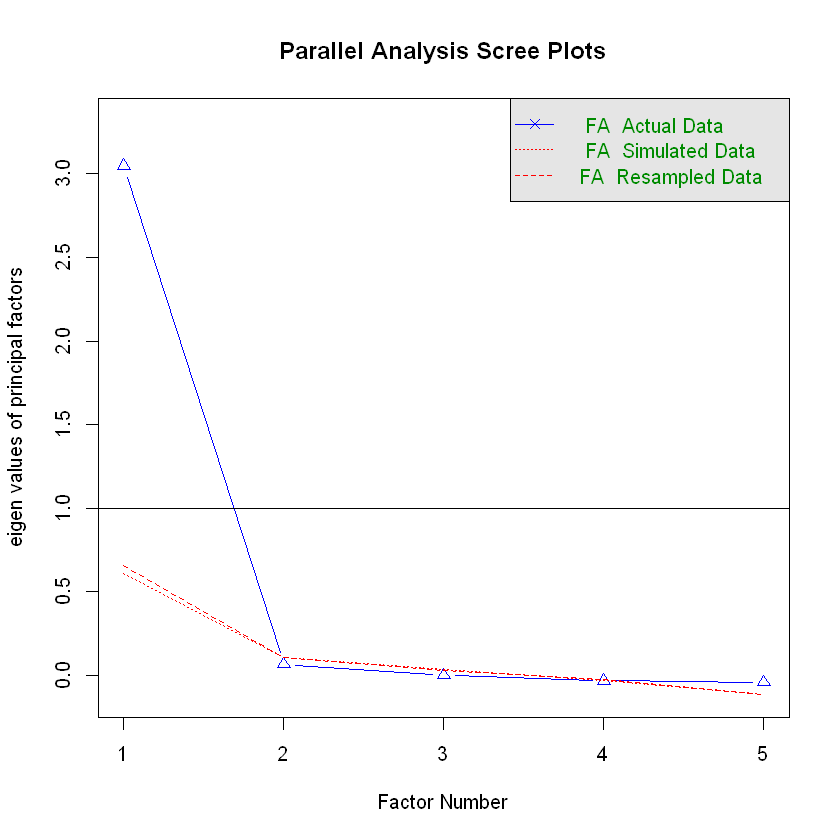

In [9]:
fa.parallel(dat, fm = 'minres', fa = 'fa')

![](Mod4_Lab1_-_Reliability_files/figure-markdown_strict/unnamed-chunk-6-1.png)

In [10]:
## Parallel analysis suggests that the number of factors =  1  and the number of components =  NA

The computer here is telling you that we see evidence for one factor.
This is supported by the graph. The red lines in the graph represent the
results from the random computer-generated data, whereas the blue line
represents your data. We see that, in the column labeled "Factor Number
1," the blue line and red lines diverge--evidence for a factor! Further,
the "eigenvalue" for that column is above 1.0 (height of blue triangle
on the y-axis).

For the remaining columns on the graph, we see that our data (blue line)
gives identical results to the simulated random data (red lines). Thus,
we have no evidence for any additional factors. Therefore, we can
conclude that we have one underlying dimension to our data. This means
we are measuring "one thing" with this set of questions.

Next, we can can focus in on our questions and consider whether our
items each correlate well with the "one underlying dimension." A good
question is conceptually close to the underlying dimension and therefore
does not "pick up" on a lot of other junk. For example, the "quirky"
question has a possible negative connotation to it; it may inadvertently
have more going on with it than simply assessing positive / negative
sentiment. Thus, I would not be surprised if it fails to correlate as
well with the underlying factor. We call these correlations "loadings."

We can run this more detailed factor analysis using the `fa()` command
from the `psych` package, specifically asking it to retrieve one factor.
We then look at the "loadings." Good questions should be highly
correlated to our underlying dimension. In general, I would be wary of
anything in the .3-.5 range or below. These loading are given in the
column labeled `MR1`:

In [11]:
fa(dat, nfactors = 1, fm="minres")$loadings

## 
## Loadings:
##          MR1  
## friendly 0.992
## inviting 0.818
## awesome  0.812
## quirky   0.299
## pleasant 0.805
## 
##                  MR1
## SS loadings    3.048
## Proportion Var 0.610


Loadings:
         MR1  
friendly 0.992
inviting 0.818
awesome  0.812
quirky   0.299
pleasant 0.805

                 MR1
SS loadings    3.048
Proportion Var 0.610

(Note: you can get much more detailed analyses if you omit the
`$loadings` code, but you won't be able to make sense of it without a
richer understanding of factor analysis, which is beyond this tutorial).

We see here that the "friendly", "inviting," "awesome," and "pleasant"
questions are highly correlated (~.80) with the underlying factor. This
is good news, because these questions are tracking closely with the
underlying dimension. However, not surprisingly, "quirky" does not load
as well. In fact, the correlation is weak, loading at only .299. At this
point, I would consider analyzing quirky separately or removing it from
the measure entirely.

There is one point worth mentioning. Factor analyses almost always
overfit the data (i.e., they will model the sample data perfectly).
Thus, they are often worth replicating in a separate set of data, if
possible. It's sometimes useful to split the data in half, for example,
training the model in one set of data and cross-validating in the other.

Reliability
===========

Next, we can assess the reliability of the measure. Technically defined,
reliability is "the percentage of variance in the scores due to the
thing you're measuring" (i.e., due to the factor). If reliability is
100%, then our measure is perfectly reliable and every bump in the data
is real variation in sentiment. If reliability is less than 100%--for
example, 80%--then most of the variation is due to the thing you are
measuring but the remaining 20% is measurement error, other random
unrelated junk that you do not care about and is watering down your
measure.

I will point out that there are trade-offs in measurement. You can get a
perfectly reliable measure by asking the same question several different
ways, but that is redundant and frankly uninformative. It's worth it to
ask questions slightly differently (e.g., words such as "friendly" and
"awesome" are both positive words but not identical). You add more
information to your measure that way, but the trade off is that
reliability can suffer. In general, reliability between .70 and .90 is
good, with .80-.95 preferred.

To run our test, we use `alpha()` from the `psych` package. Since both
`ggplot2` and `psych` have commands with that name, it's useful to
preface the command with `psych::` to be sure that it pulls the command
from `psych`:

In [12]:
psych::alpha(dat)

## 
## Reliability analysis   
## Call: psych::alpha(x = dat)
## 
##   raw_alpha std.alpha G6(smc) average_r S/N    ase mean  sd
##       0.86      0.86    0.87      0.54 5.9 0.0098  8.3 1.1
## 
##  lower alpha upper     95% confidence boundaries
## 0.84 0.86 0.88 
## 
##  Reliability if an item is dropped:
##          raw_alpha std.alpha G6(smc) average_r  S/N alpha se
## friendly      0.77      0.77    0.75      0.45  3.3    0.016
## inviting      0.80      0.81    0.82      0.51  4.1    0.012
## awesome       0.81      0.81    0.82      0.51  4.1    0.012
## quirky        0.91      0.92    0.91      0.73 10.9    0.011
## pleasant      0.81      0.80    0.82      0.51  4.1    0.011
## 
##  Item statistics 
##            n raw.r std.r r.cor r.drop mean   sd
## friendly 200  0.95  0.93  0.96   0.92  7.9 1.35
## inviting 200  0.88  0.85  0.82   0.78  7.8 1.54
## awesome  200  0.88  0.84  0.81   0.77  7.9 1.70
## quirky   200  0.31  0.51  0.30   0.29 10.0 0.14
## pleasant 200  0.87  0.85  0.82   0.76  7.8 1.61


Reliability analysis   
Call: psych::alpha(x = dat)

  raw_alpha std.alpha G6(smc) average_r S/N    ase mean  sd median_r
      0.86      0.86    0.87      0.54 5.9 0.0098  8.3 1.1     0.64

 lower alpha upper     95% confidence boundaries
0.84 0.86 0.88 

 Reliability if an item is dropped:
         raw_alpha std.alpha G6(smc) average_r  S/N alpha se  var.r med.r
friendly      0.77      0.77    0.75      0.45  3.3    0.016 0.0526  0.46
inviting      0.80      0.81    0.82      0.51  4.1    0.012 0.0736  0.47
awesome       0.81      0.81    0.82      0.51  4.1    0.012 0.0764  0.47
quirky        0.91      0.92    0.91      0.73 10.9    0.011 0.0069  0.75
pleasant      0.81      0.80    0.82      0.51  4.1    0.011 0.0818  0.50

 Item statistics 
           n raw.r std.r r.cor r.drop mean   sd
friendly 200  0.95  0.93  0.96   0.92  7.9 1.35
inviting 200  0.88  0.85  0.82   0.78  7.8 1.54
awesome  200  0.88  0.84  0.81   0.77  7.9 1.70
quirky   200  0.31  0.51  0.30   0.29 10.0 0.14
ple

The top row gives us what we want:

`raw_alpha`  
`0.86`

Our measure is an estimated 86% reliable, or only 14% measurement error.
This row also tells us that the average correlation among our items is
.54. Can we do better?

However, this included `quirky`. We see below the top row is the line,
`Reliability if an item is dropped:` which reports that dropping
`quirky` would actually improve our reliability to .91. This row also
tells us that the average correlation among our questions would increase
to .73.

This confirms our gut intuition, our factor analysis, and now our
reliability analysis. I would drop the quirky item (and report it
separately if desired).

You can quickly score the scale using `rowSums()`, which accepts a
`data.frame()` of the desired variables.

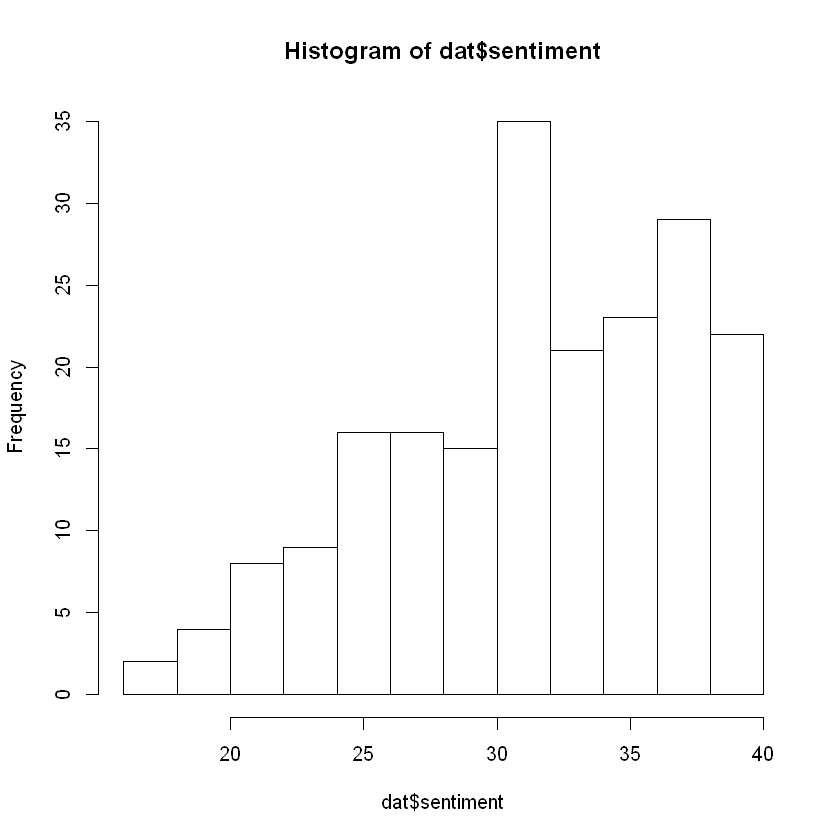

In [13]:
dat$sentiment <- rowSums(data.frame(dat$friendly, dat$inviting, dat$awesome, dat$pleasant))

hist(dat$sentiment)

![](Mod4_Lab1_-_Reliability_files/figure-markdown_strict/unnamed-chunk-9-1.png)

We still have not assessed whether the thing we are measuring *is*
sentiment. For example, maybe it's just measuring enthusiasm in filling
out survey questions! Still, it's a start. We can next explore the
validity of the measure, which we will do in the next lab.

Future Directions
=================

This is but a first taste of measurement development. There is an entire
field known as "psychometrics" with many fantastic tools for measurement
development. Good measurement is hard, but without good measurement, our
data are wrong. Further, some cases misleading data can be worse than no
data. Taking the time to assess the reliability and validity of measures
is therefore vital to doing good data science whenever measures must be
constructed.